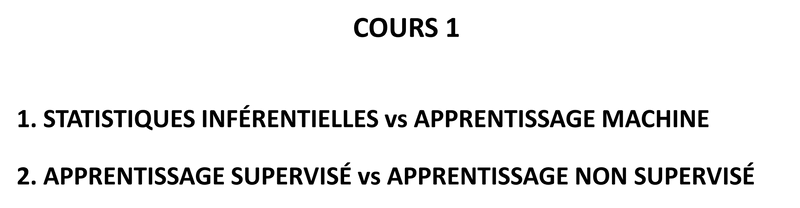

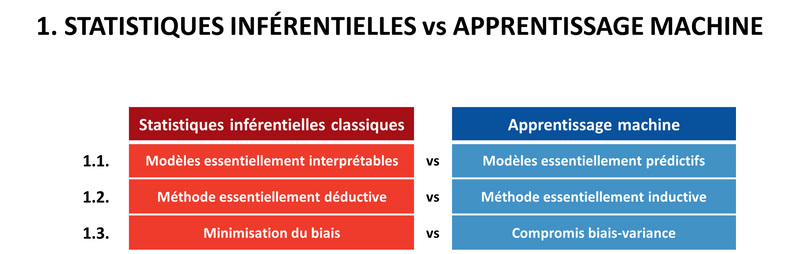

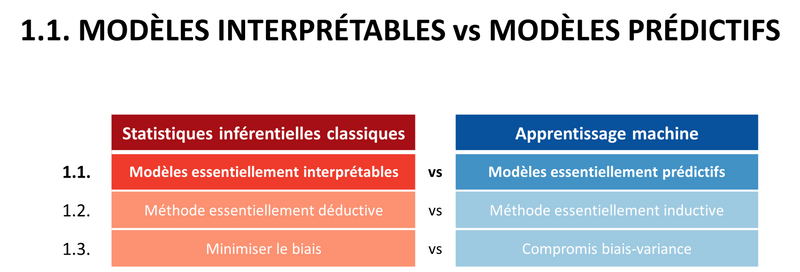

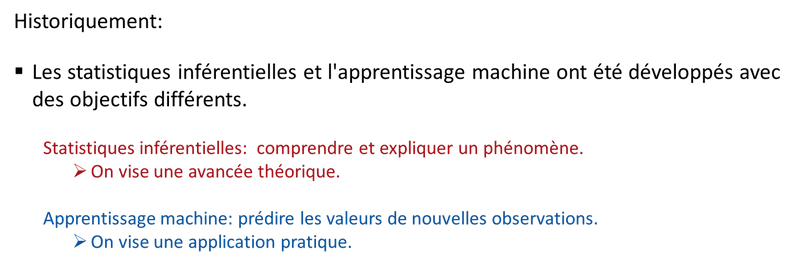

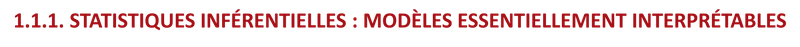

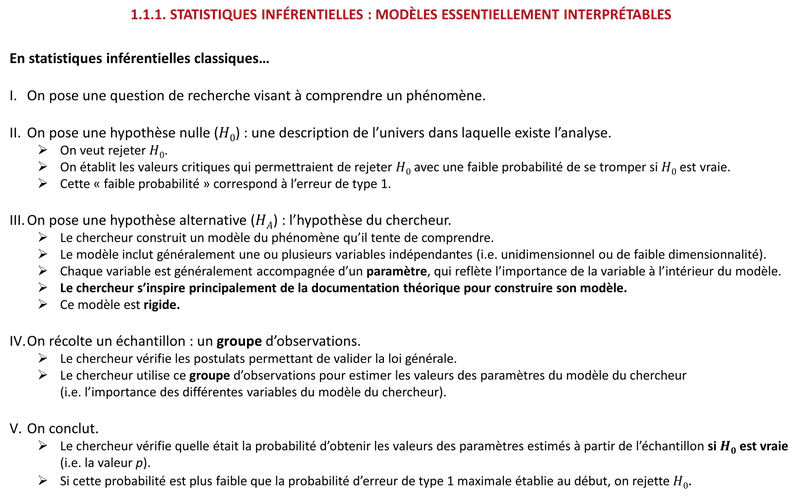

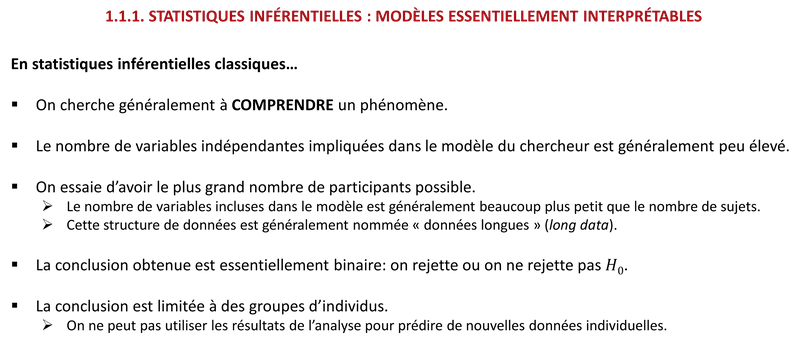

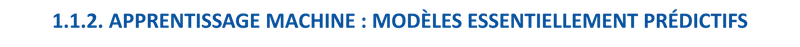

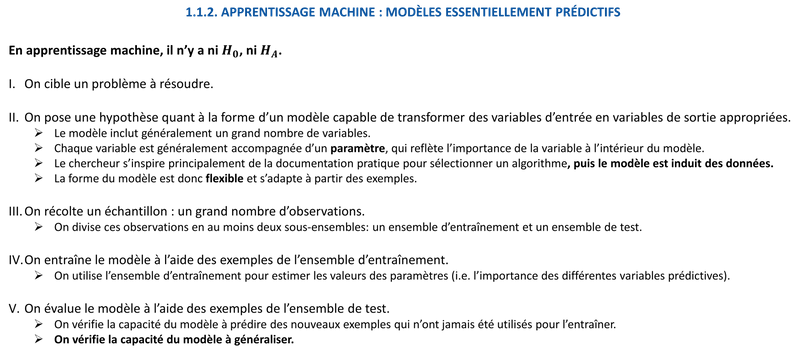

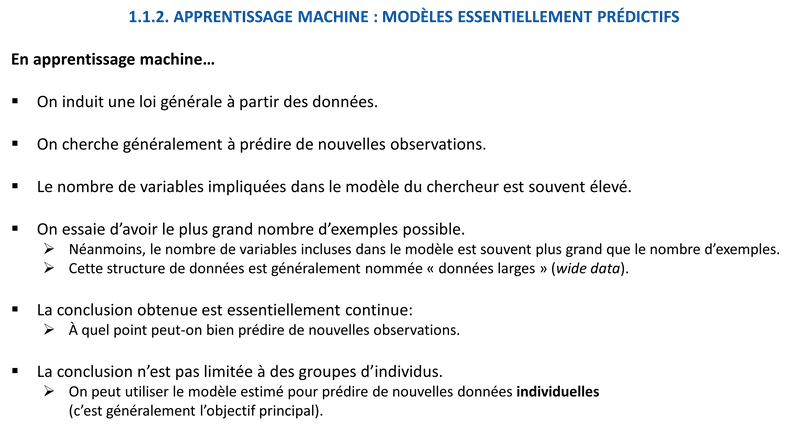

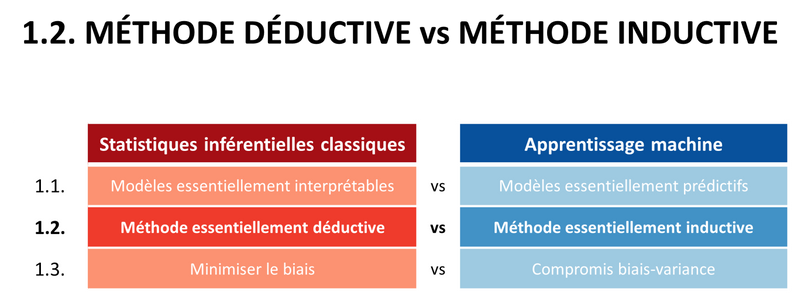

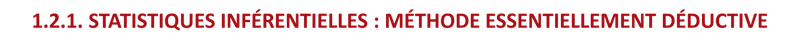

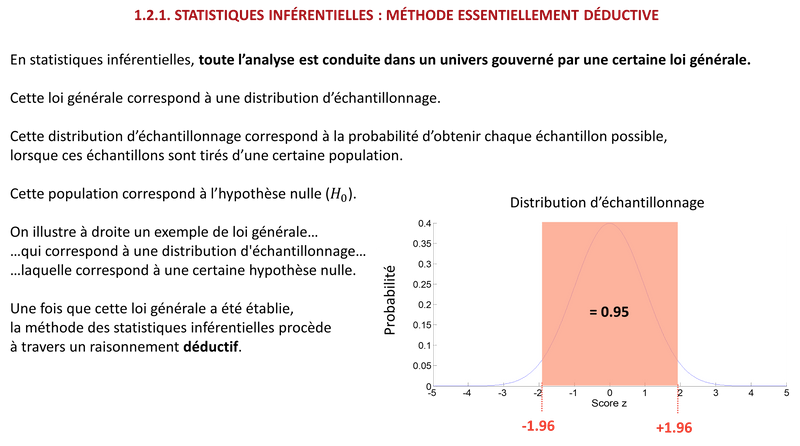

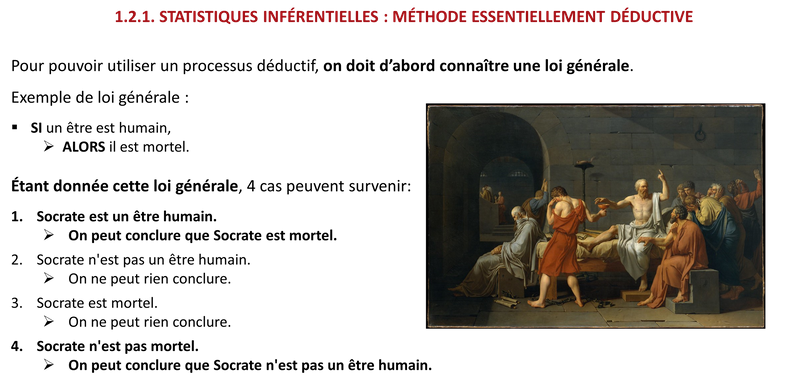

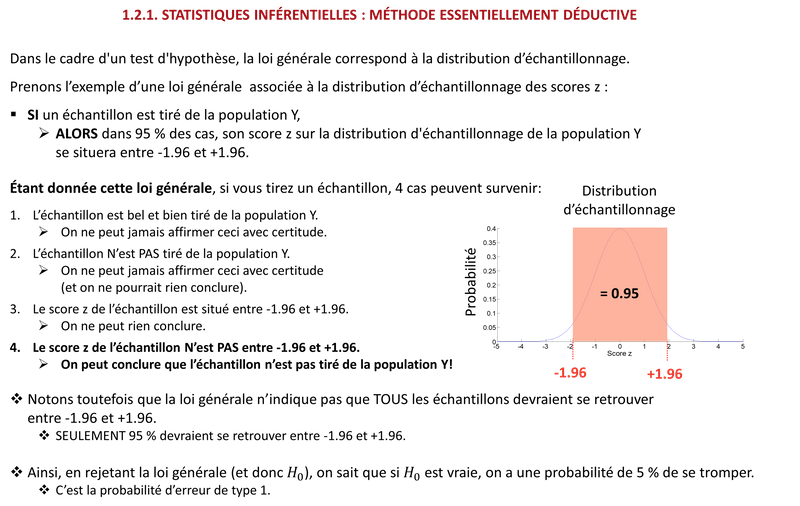

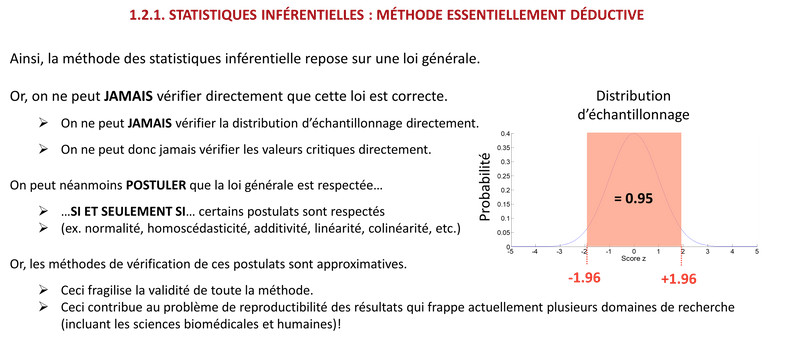

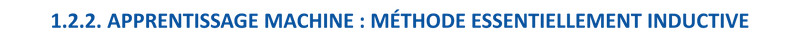

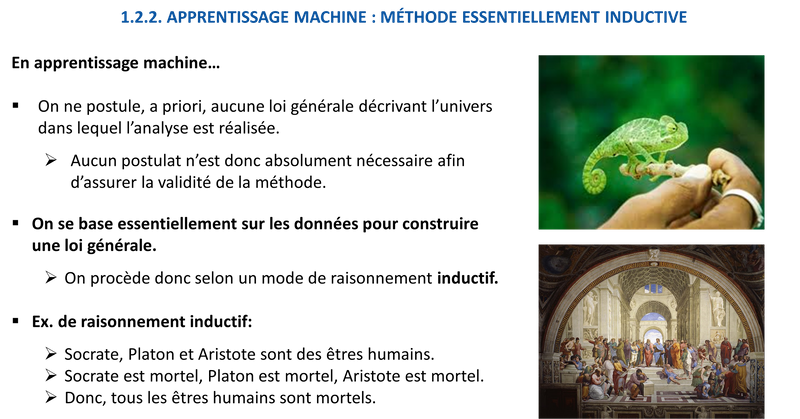

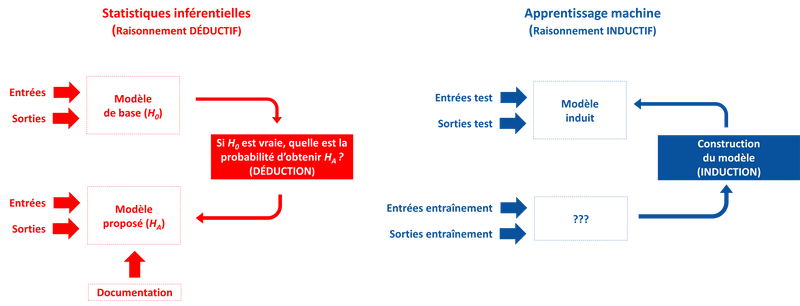

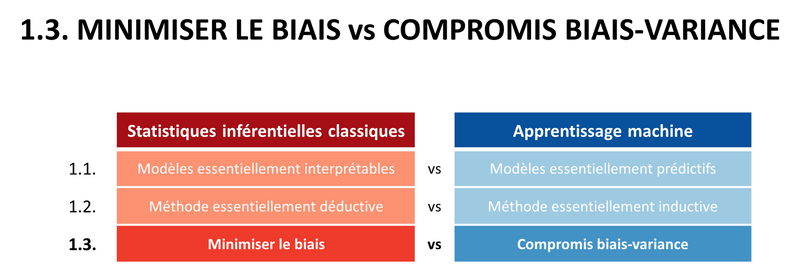

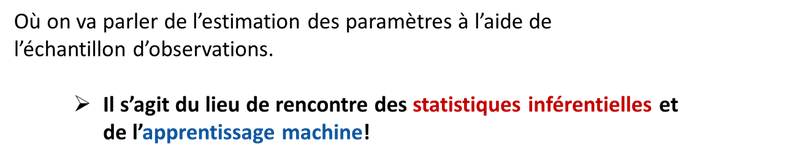

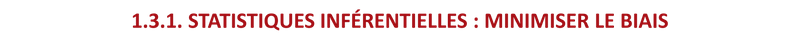

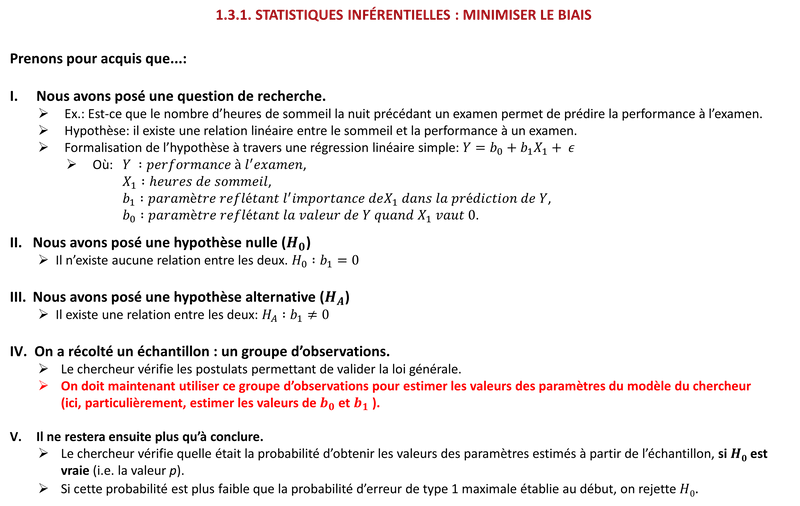

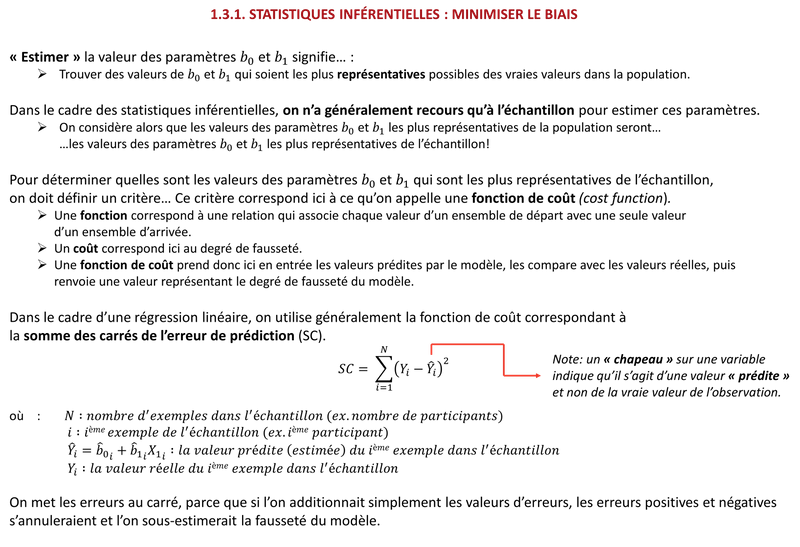

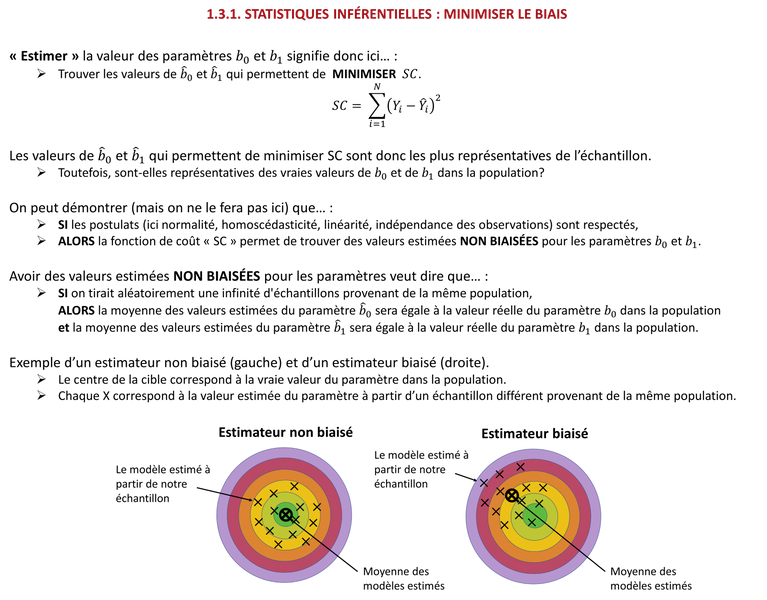

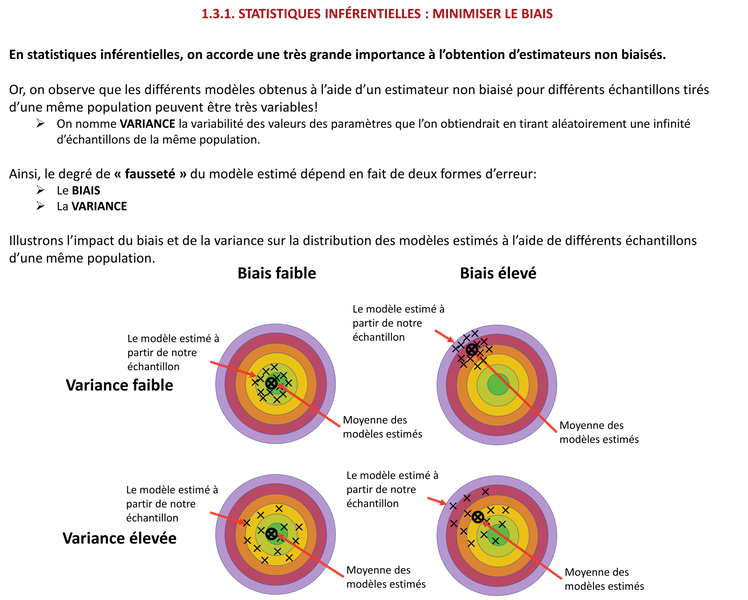

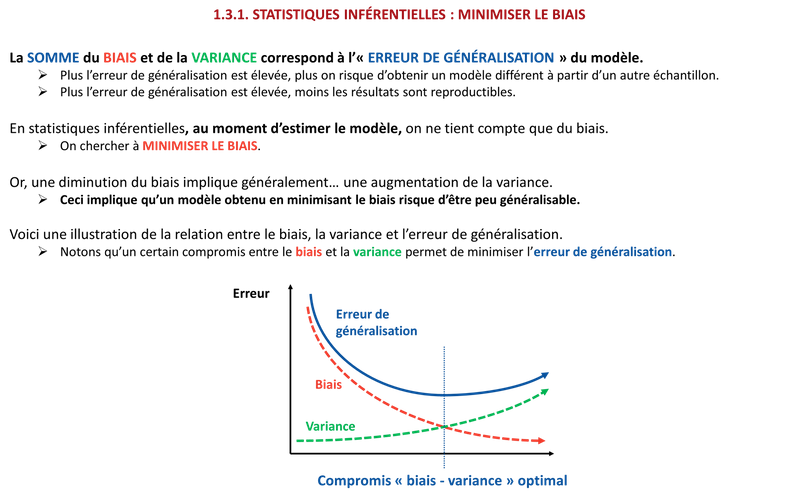

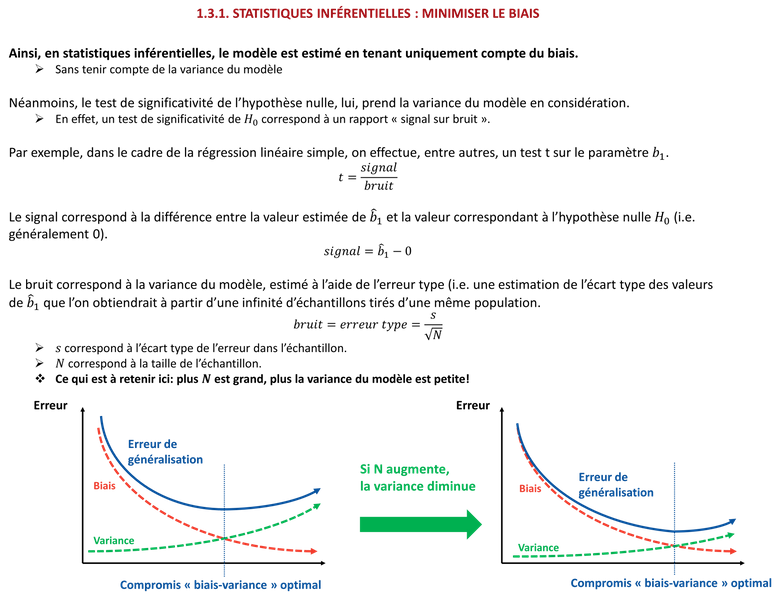

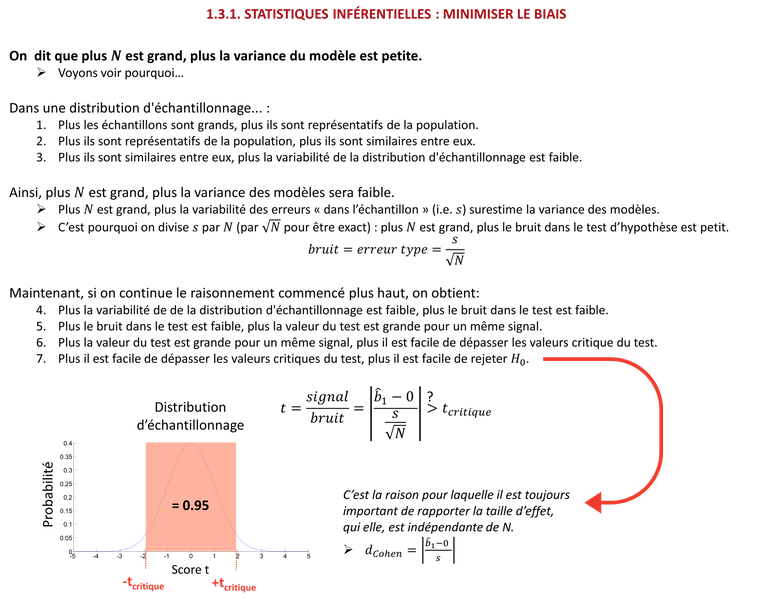

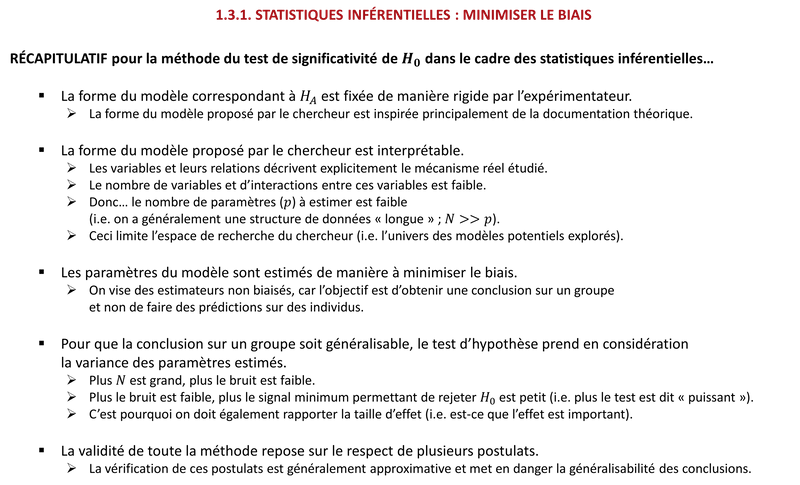

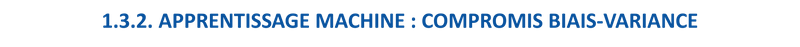

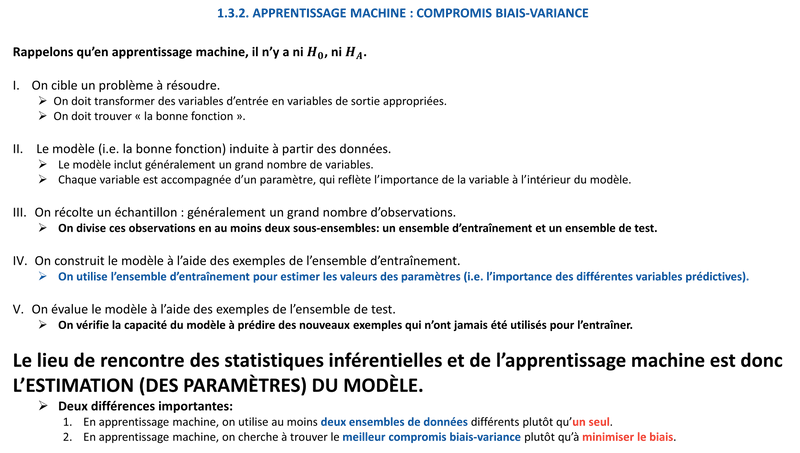

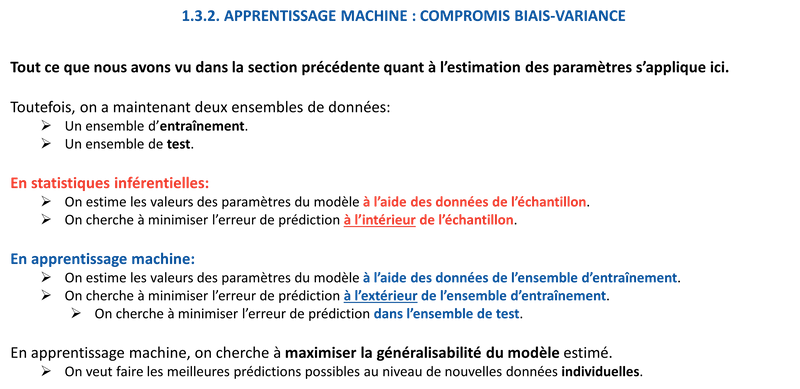

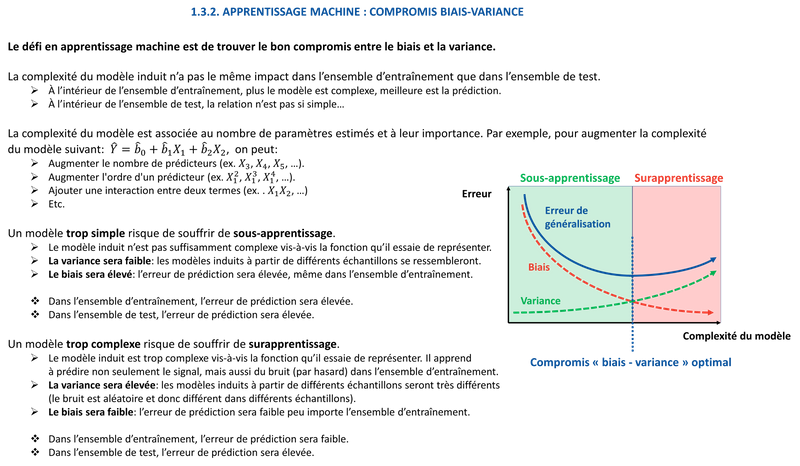

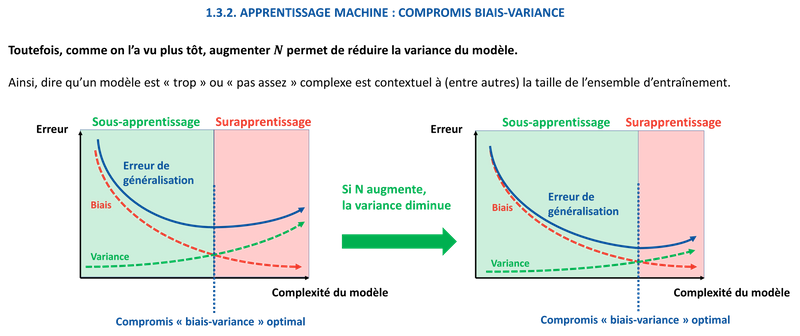

### ***FAISONS UN EXEMPLE***

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 100
degree = 10

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : entraîner le modèle (ensemble "Entraînement")
# -----------------------------------------------------------------------------
polynomial_features = PolynomialFeatures(degree)
model = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", model)])

pipeline.fit(X_train[:, np.newaxis], y_train)

scores_train = pipeline.score(X_train[:, np.newaxis], y_train)

# -----------------------------------------------------------------------------
# ÉTAPE 5 : vérifier la généralisabilité des résultats (ensemble "Test")
# -----------------------------------------------------------------------------
scores_test = pipeline.score(X_test[:, np.newaxis], y_test)

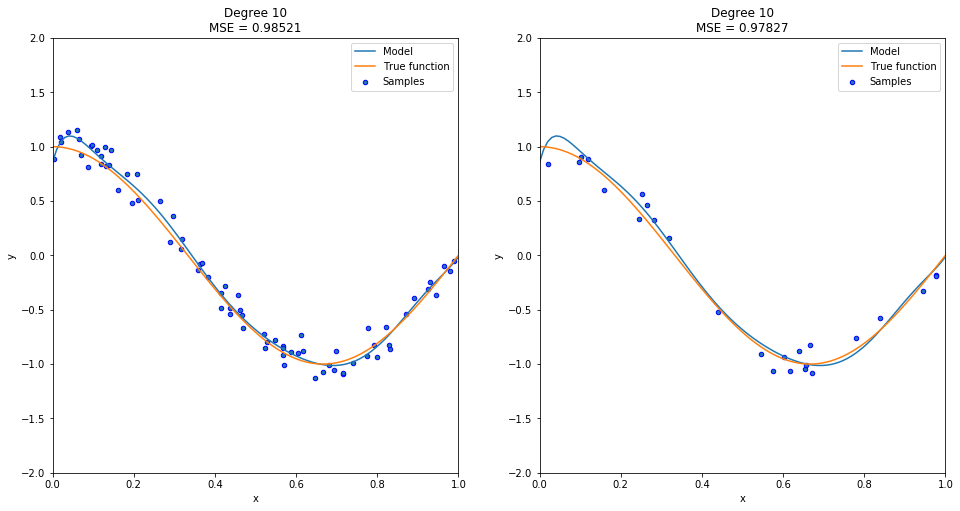

In [2]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
X = np.linspace(0, 1, 100)
plt.plot(X, pipeline.predict(X[:, np.newaxis]), label="Model")
plt.plot(X, true_fun(X), label="True function")
plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\nMSE = {:.5f}".format(degree, scores_train.mean()))


plt.subplot(1, 2, 2)
plt.plot(X, pipeline.predict(X[:, np.newaxis]), label="Model")
plt.plot(X, true_fun(X), label="True function")
plt.scatter(X_test, y_test, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\nMSE = {:.5f}".format(degree, scores_test.mean()))

plt.show()

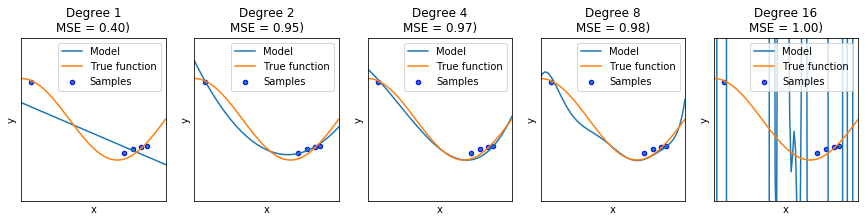

In [3]:
# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 20
degrees = [1, 2, 4, 8, 16]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y)

# -----------------------------------------------------------------------------
# ÉTAPE 4 : entraîner le modèle (ensemble "Entraînement")
# -----------------------------------------------------------------------------

plt.figure(figsize=(15, 3))

for i in range(len(degrees)):
    
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i])
    
    model = LinearRegression()
    
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", model)])
    
    pipeline.fit(X_train[:, np.newaxis], y_train)

    scores_train = pipeline.score(X_train[:, np.newaxis], y_train)
    
    # -----------------------------------------------------------------------------
    # ÉTAPE 5 : vérifier la généralisabilité des résultats (ensemble "Test")
    # -----------------------------------------------------------------------------
    
    scores_test = pipeline.score(X_test[:, np.newaxis], y_test)

    X = np.linspace(0, 1, 100)
    plt.plot(X, pipeline.predict(X[:, np.newaxis]), label="Model")
    plt.plot(X, true_fun(X), label="True function")
    plt.scatter(X_test, y_test, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2f})".format(degrees[i], scores_train.mean()))
    
plt.show()

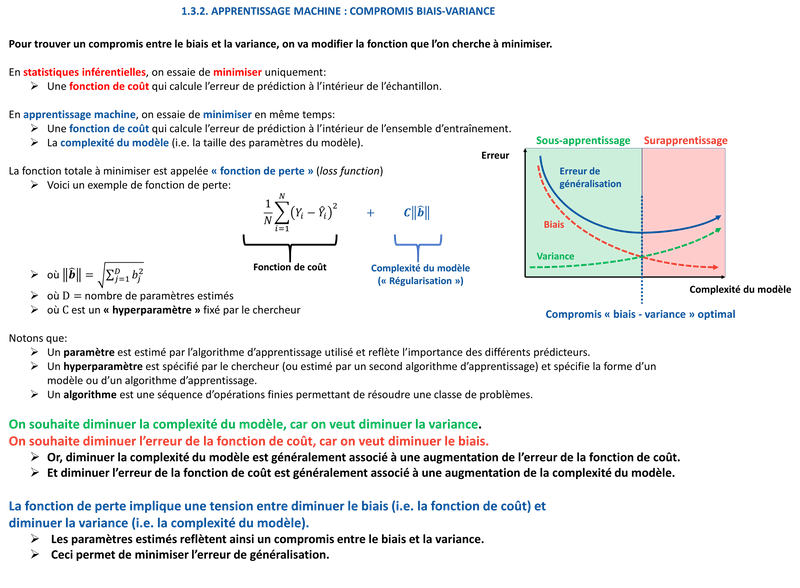

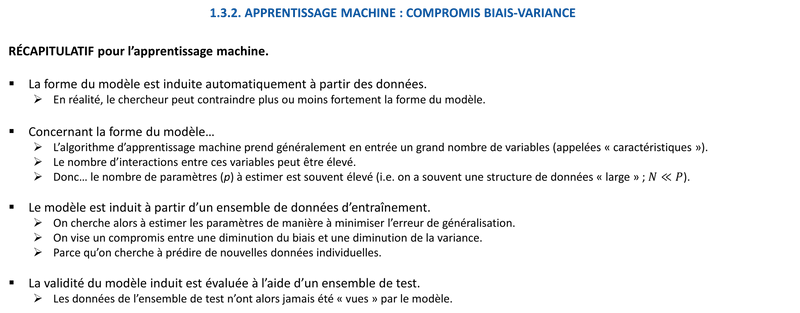

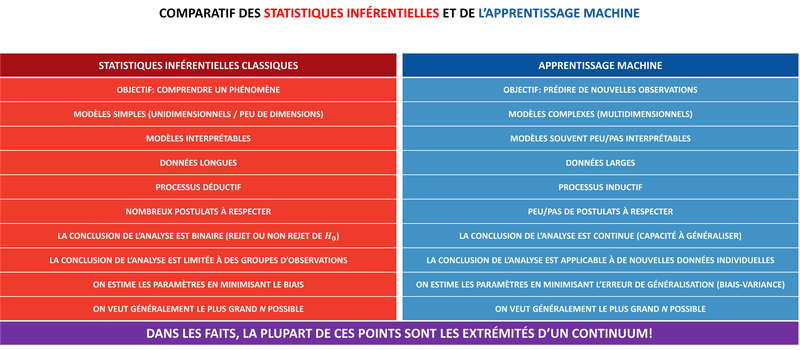

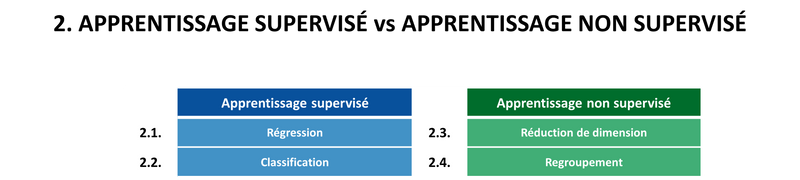

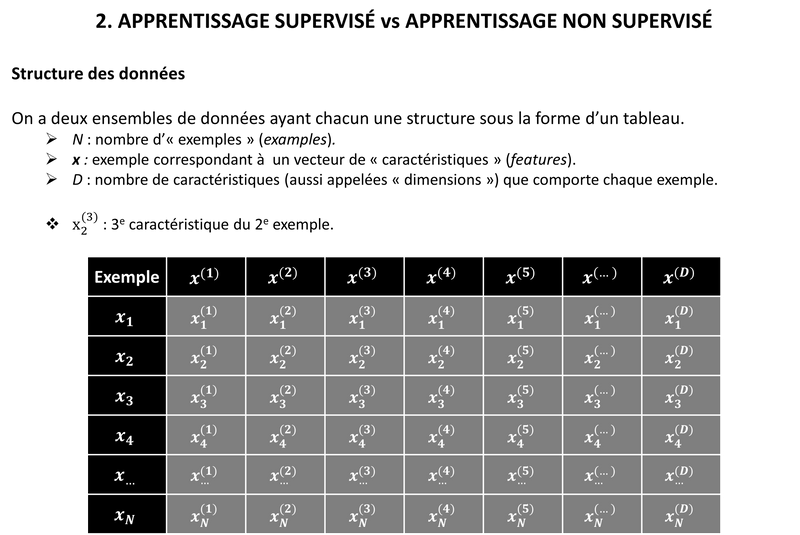

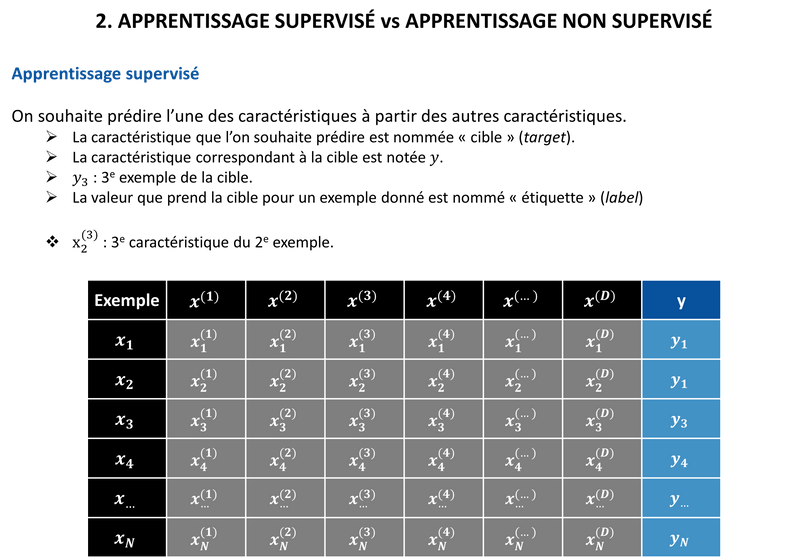

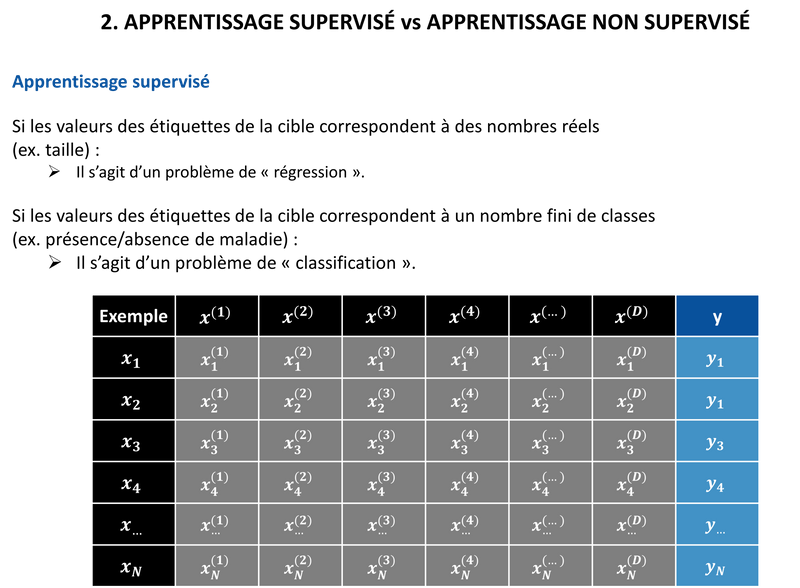

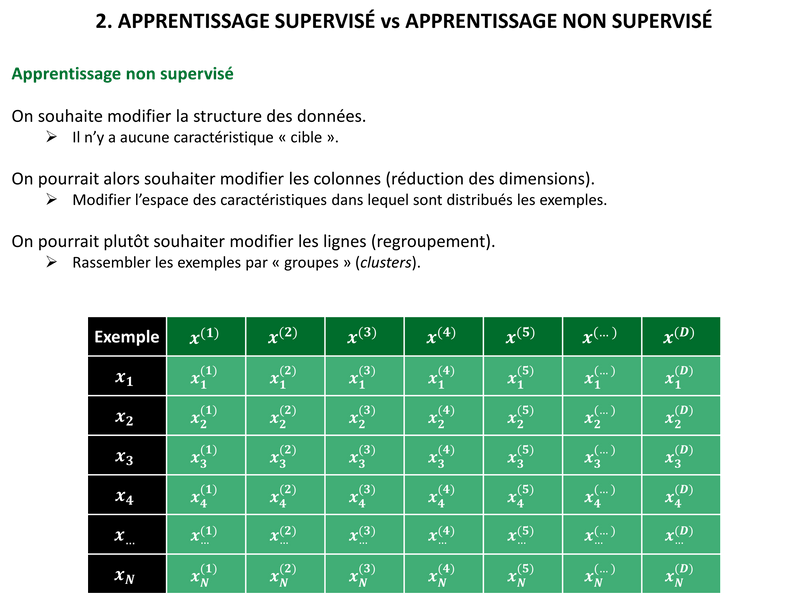

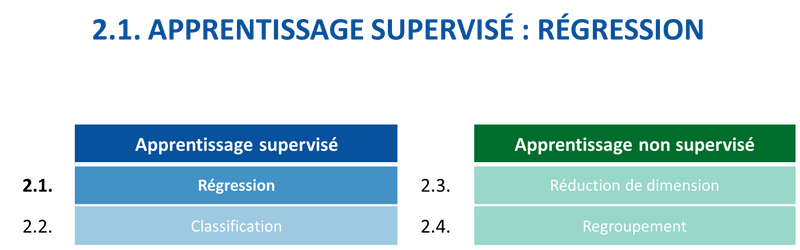

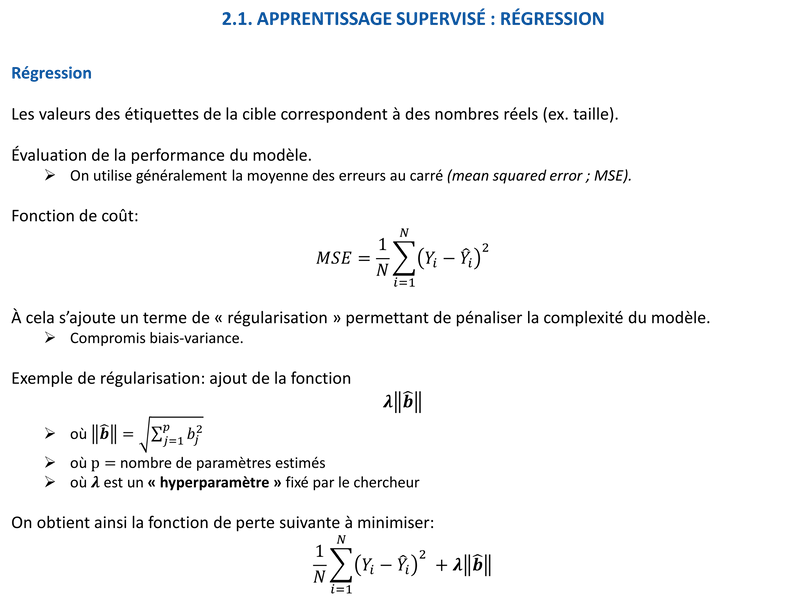

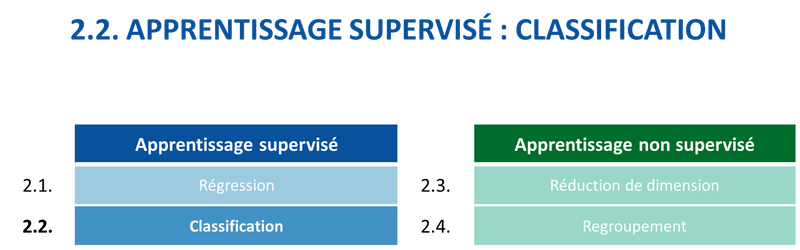

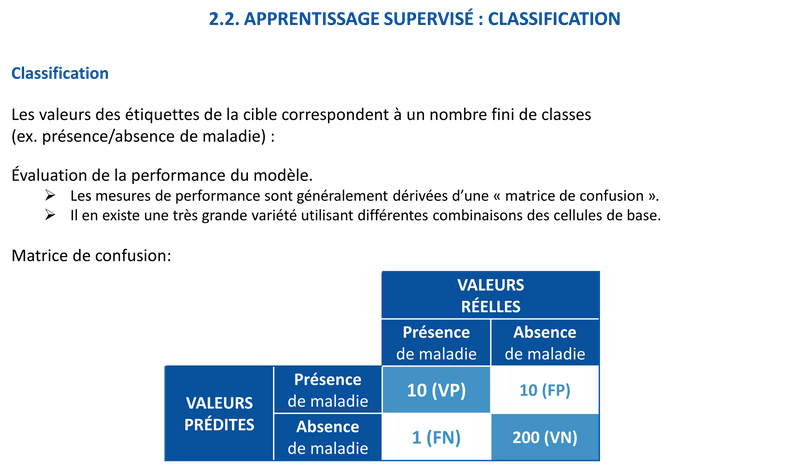

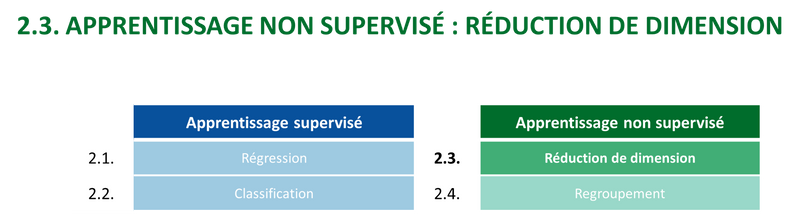

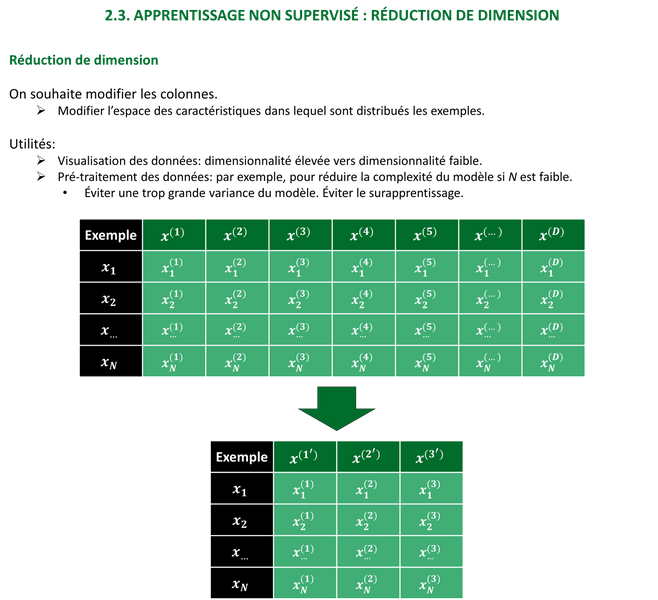

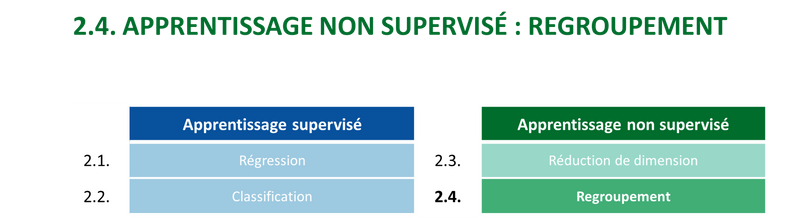

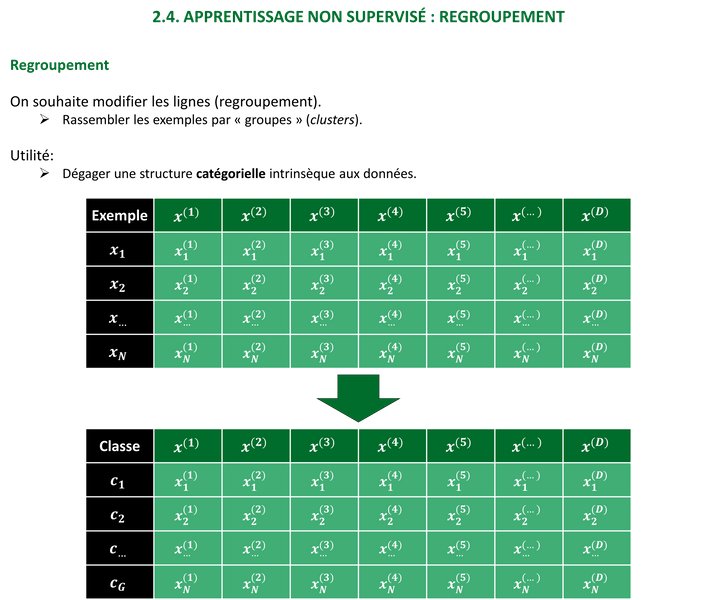